# Problem 1: Human Capital Accumulation

We consider a two period model where a worker maximizes his or her utility and allow for human capital accumulation (e.g. education). 

Let $t \in \{ 1,2\}$. In each period the worker decides to work $l_t = 1$ or to not work $l_t = 0$. 
We impose the restriction that the worker cannot save or borrow and thus all of their income is consumed each period. 
While employed her consumption is given by her work effort, $l_t$, constant wage rate, $w$, and skill level, $h_t$, which can be expressed as,
$$ \begin{align} c_t = wh_t l_t.\end{align} $$
While unemployed the income is given by the unemployment benefits, $b$, and the consumption is given by,
$$ \begin{align} c_t = b. \end{align} $$
The human capital accumulates by $h_2 = h_1 +l_1 + \begin{cases} 0 \hspace{0.2cm} \text{with prob 0.5} \\ \Delta \hspace{0.2cm} \text{with prob 0.5}. \\\end{cases} $

The worker's maximizes their utility function in period two following,
$$ v_2(h_2) = \underset{l_2}{max} \frac{c_2^{1-\rho}}{1-\rho}-\gamma l_2   \hspace{1cm} s.t. \hspace{0.2cm} c_2 = wh_2l_2,\hspace{0.2cm} l_2 \in \{ 0,1\}$$
$$ v_1(h_1) = \underset{l_1}{max} \frac{c_1^{1-\rho}}{1-\rho}-\gamma l_1 + \beta E_1\left[ v_2(h_2) \right]   \hspace{1cm} s.t. \hspace{0.2cm} c_2 = wh_1l_1,\hspace{0.2cm} l_2 \in \{ 0,1\}, \hspace{0.2cm} h_2 = h_1 +l_1 + \begin{cases} 0 \hspace{0.2cm} \text{with prob 0.5} \\ \Delta \hspace{0.2cm} \text{with prob 0.5}, \\\end{cases}$$
where $\beta$ is the discount factor. 



**Question 1: Solve the model in period 2 and illustrate the solution (including labor supply as a
function of human capital).** 

Provided the initial parameter values of the model and the levels of human capital:

In [280]:
# Provided Python packages
import numpy as n
from scipy import interpolate
%matplotlib inline
import matplotlib.pyplot as plt
import ipywidgets as widgets

# Parameter values
rho = 2
beta = 0.96
gamma = 0.1
w = 2
b = 1
Delta = 0.1

# Levels of human capital
h_vec = np.linspace(0.1,1.5,100) 

We define our basic model fuctions given the information above,

In [281]:
# Defining basic functions taking inspiration from Problem set 7 

def c(h,l,w,b): # Consumption function based on work or not work
    if l == 1:
        return  w*h*l # Consumption wehen woking
    elif l == 0:
        return  b # Consumption being equal to the unemployment benefits

def utility(h,l,rho,gamma,w,b): # Utility from consumption and disutility from working
    return c(h,l,w,b)**(1-rho)/(1-rho) - gamma*l

def v2(h2,l2,rho,gamma,w,b): # Function to maximize in period 2 
    return utility(h2,l2,rho,gamma,w,b)

def v1(h1,l1,v2_interp,rho,gamma,w,b): # Function to maximize in period 1 given expectations of period 2
    
    # a. v2 value, if low skill accumulation
    h2_low = h1 + l1 
    v2_low = v2_interp([h2_low])[0]
    
    # b. v2 value, if high skill accumulation
    h2_high = h1 + l1 + Delta
    v2_high = v2_interp([h2_high])[0]
    
    # c. expected v2 value
    v2 = 0.5*v2_low + 0.5*v2_high
    
    # d. total value
    return utility(h1,l1,rho,gamma,w,b) + beta*v2 

We define our solution functions,

In [282]:
# 1. Defining solution function
def solve_period_2(h_vec,rho,gamma,w,b):
    
    # a. Creating grids
    v2_vec =  np.empty(100)
    l2_vec = np.empty(100)
    v2_vec_unemp = np.empty(100)

    # b. loop for each element in capital vector
    for i, h2 in enumerate(h_vec):
    
        # i. utility comparison, selecting labour value and writing to list
        if (v2(h2,1,rho,gamma,w,b) > v2(h2,0,rho,gamma,w,b)) == True: 
            l2_vec[i] = 1
        else: # utility when not working
            l2_vec[i] = 0
            
        # ii. feeding into list
        v2_vec[i] = v2(h2,l2_vec[i],rho,gamma,w,b)
        v2_vec_unemp[i] = utility(h2,0,rho,gamma,w,b)
    
    return v2_vec, l2_vec, v2_vec_unemp

# 2. Solving for utility and labour
v2_vec,l2_vec,v2_vec_unemp =  solve_period_2(h_vec,rho,gamma,w,b)

Plotting the function of the workers utility given their human capital accumulation gives the following graph.

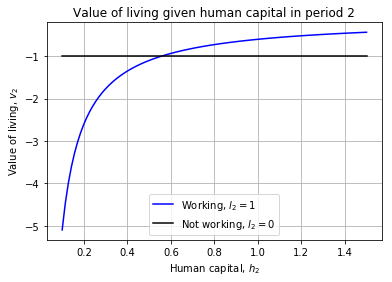

The break is found at h ≥ 0.567


In [283]:
# Plotting the value of living given skill accumulation
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(h_vec, v2(h_vec,1,rho,gamma,w,b), color = "blue")
ax.plot(h_vec, v2_vec_unemp, color = "black")
ax.grid()
ax.set_xlabel('Human capital, $h_2$')
ax.set_ylabel('Value of living, $v_2$')
ax.set_title('Value of living given human capital in period 2')
plt.legend(('Working, $l_2=1$','Not working, $l_2=0$'),loc='lower center')
plt.show()
index = np.where(l2_vec == 1)[0][0];
print('The break is found at h ≥ ' + str(round(h_vec[index],3)))

From the graph we see that based on the parameter values the worker obtains negative utility regardless of working or not, however they receive less disutility when their skill level is above around 0.567. Next, we plot the labour supply as a function of human capital.

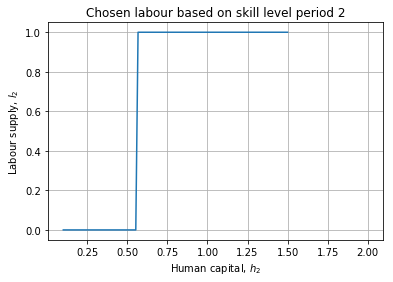

In [284]:
# Plotting labour supply as function of humn capital, period 2
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(h_vec, l2_vec,rho,gamma,w,b)
ax.grid()
ax.set_xlabel('Human capital, $h_2$')
ax.set_ylabel('Labour supply, $l_2$')
ax.set_title('Chosen labour based on skill level period 2')
plt.show()

As shown in the graph if the worker accumulates human capital that exceeds around 0.55 then the worker will choose to work in period 2, as this provides the worker with a higher amount of utility (see the first figure). If the human capital is insufficient, the worker will choose not to work and instead reap the unemployment benefits as the disutiliy from working outweighs the utility of consumption based on wage rate and labour supply. 

**Question 2: Solve the model in period 1 and illustrate the solution (including labor supply as a
function of human capital).**

Similar to question one we first define the solution function,

In [285]:
# 1. Constructing the interpolator
v2_interp = interpolate.RegularGridInterpolator([h_vec],v2_vec,bounds_error=False,fill_value=None)

def solve_period_1(h_vec, v2_interp,rho,gamma,w,b):
    
    # a. Creating grids
    v1_vec =  np.empty(100)
    l1_vec = np.empty(100)
    v1_vec_unemp = np.empty(100)
    
    # b. loop for each element in capital vector
    for i,h1 in enumerate(h_vec): 
        
        # i. utility comparison, selecting labour value and writing to list
        if (v1(h1,1,v2_interp,rho,gamma,w,b) > v1(h1,0,v2_interp,rho,gamma,w,b)) == True: 
            l1_vec[i] = 1
        else: # utility when not working
            l1_vec[i] = 0
            
        # ii. feeding into list
        v1_vec[i] = v1(h1,l1_vec[i],v2_interp,rho,gamma,w,b)
        v1_vec_unemp[i] = utility(h1,0,rho,gamma,w,b)
    
    return v1_vec, l1_vec, v1_vec_unemp

# 2. Solving for utility and labour
v1_vec, l1_vec, v1_vec_unemp =  solve_period_1(h_vec, v2_interp,rho,gamma,w,b)

Next, we plot the labour supply as a function of human capital.

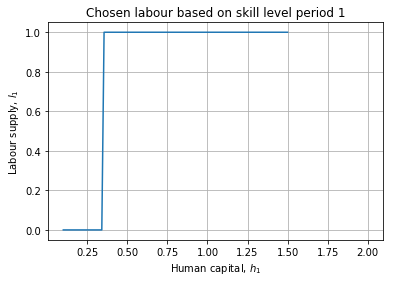

In [286]:
# Plotting labour supply as function of humn capital, period 1
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(h_vec, l1_vec,rho,gamma,w,b)
ax.grid()
ax.set_xlabel('Human capital, $h_1$')
ax.set_ylabel('Labour supply, $l_1$')
ax.set_title('Chosen labour based on skill level period 1')
plt.show()

We see that the skill level required for to incentivize the worker to work has been lowered to approximately 0.35. Given that the worker has a chance of gaining experience and thus accumulating human capital (as demoninated by $\Delta$), the second period requires a higher amount of human capital in order for the worker to work. 

Next, we plot the utility as a function of human capital accumulation.

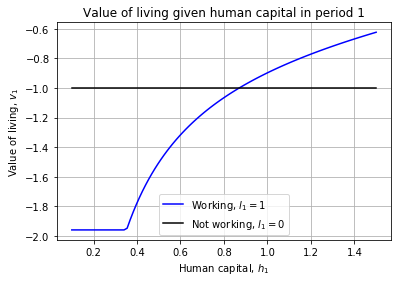

The break is found at h ≥ 0.355


In [287]:
# Plotting the value of living given skill accumulation
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(h_vec, v1_vec, color = "blue")
ax.plot(h_vec,v1_vec_unemp, color = 'black')
ax.grid()
ax.set_xlabel('Human capital, $h_1$')
ax.set_ylabel('Value of living, $v_1$')
ax.set_title('Value of living given human capital in period 1')
plt.legend(('Working, $l_1=1$','Not working, $l_1=0$'),loc='lower center')
plt.show()
index = np.where(l1_vec == 1)[0][0];
print('The break is found at h ≥ ' + str(round(h_vec[index],3)))

From the graph we see that the point when the worker wants to work is when the human capital is at a level of $h = 0.355$ or above. 


**Question 3: Will the worker never work if her potential wage income is lower than the
unemployment benefits she can get? Explain and illustrate why or why not.**

We illustrate the effects of changing the wage rate, $w$, aversion to work, $\gamma$ and the unemployment benefits, $b$, to the workers value of living in period 1 and period 2. 

In [288]:
# Defining function with the three main arguments
def int_fig(w,b,gamma):

    # 1. Unpacking solutions
    v1_vec, l1_vec, v1_vec_unemp =  solve_period_1(h_vec, v2_interp,rho,gamma,w,b)
    v2_vec,l2_vec, v2_vec_unemp =  solve_period_2(h_vec,rho,gamma,w,b)

    # 2. Creating figure
    fig, ((ax1, ax3), (ax2, ax4)) = plt.subplots(nrows=2,  ncols=2, sharex=True, figsize=(14,10))
    
    # Setting up subfigures
    # Value of living period 1
    ax1.plot(h_vec,v1_vec_unemp, label='Utility if $l_1=0$', color = 'black')
    ax1.plot(h_vec,v1_vec, label='Utility if $l_1=1$', color = 'blue')
    ax1.grid()
    ax1.legend(loc='lower right')
    ax1.set_xlabel('Human capital, $h_1$')
    ax1.set_ylabel('Value of living, $v_1$')
    ax1.set_title('Value of living period 1');

    # Human capital / Labour supply period 1
    ax2.plot(h_vec,l1_vec, label='Labor supply')
    ax2.grid()
    ax2.set_xlabel('Human caital, $h_1$')
    ax2.set_ylabel('Labor supply, $l_1$')
    ax2.set_title('Labour supply as a function of human capital period 1');
    
    # Value of living period 2
    ax1.plot(h_vec,v2_vec_unemp, label='Utility if $l_2=0$', color = 'black')
    ax3.plot(h_vec,v2_vec, label='Utility if $l_2=1$', color = 'blue')
    ax3.grid()
    ax3.legend(loc='lower right')
    ax3.set_xlabel('Human capital, $h_2$')
    ax3.set_ylabel('Value of living, $v_2$')
    ax3.set_title('Value of living in period 2');

    # Human capital / Labour supply period 2
    ax4.plot(h_vec,l2_vec, label='Labor supply')
    ax4.grid()
    ax4.legend(loc='lower right')
    ax4.set_xlabel('Human capital, $h_2$')
    ax4.set_ylabel('Labor supply, $l_2$')
    ax4.set_title('Labour supply as a function of human capital period 2');

# 3. Interactive widgets for benefits, wages and work aversion
widgets.interact(int_fig,
    b = widgets.FloatSlider(
                    value=1,
                    description='Unemployment benefits', 
                    min=0.1,
                    max=5, 
                    step=0.1,
                    ),
    w = widgets.FloatSlider(
                    value=2,
                    description='Wage rate', 
                    min=0.1,
                    max=5, 
                    step=0.1,
                    ),
    gamma = widgets.FloatSlider(
                    value=0.1,
                    description='Aversion to work', 
                    min=0,
                    max=5, 
                    step=0.1,
                    )
); 

interactive(children=(FloatSlider(value=2.0, description='Wage rate', max=5.0, min=0.1), FloatSlider(value=1.0…

It is possible that the worker has no reason to work in either the first or the second period given that the benefits of not working are high enough. This is also in line with basic economic intuition. Conversely, it is possible that the worker decides to work even though the wages are lower than the benefits given a sufficiently low aversion to work and high enough level of human capital. 

Overall, there is no definitive answer as it depends on the relative relationship between wages, benefits and the disutility of working.